<a href="https://colab.research.google.com/github/PaulRobertH/wine-ml-portfolio/blob/main/PortfolioAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3645280484.py:99: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


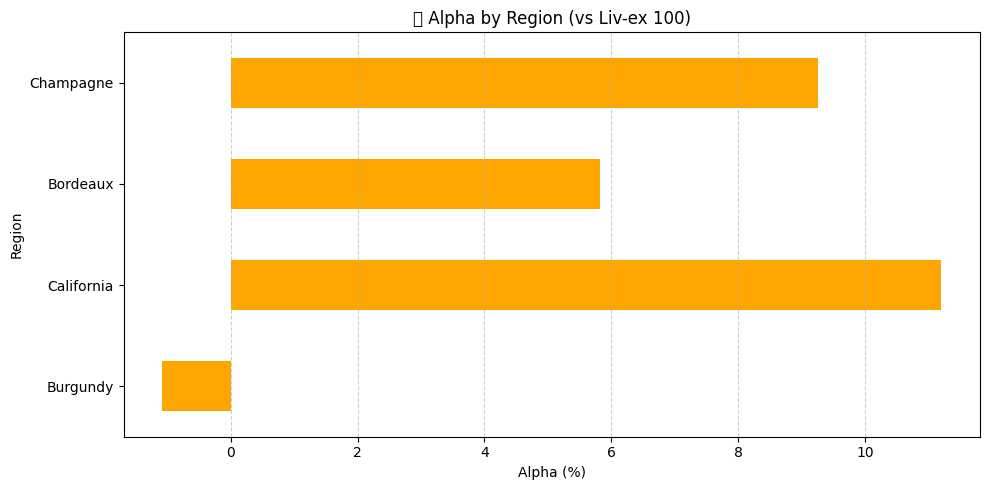

/tmp/ipython-input-3645280484.py:112: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


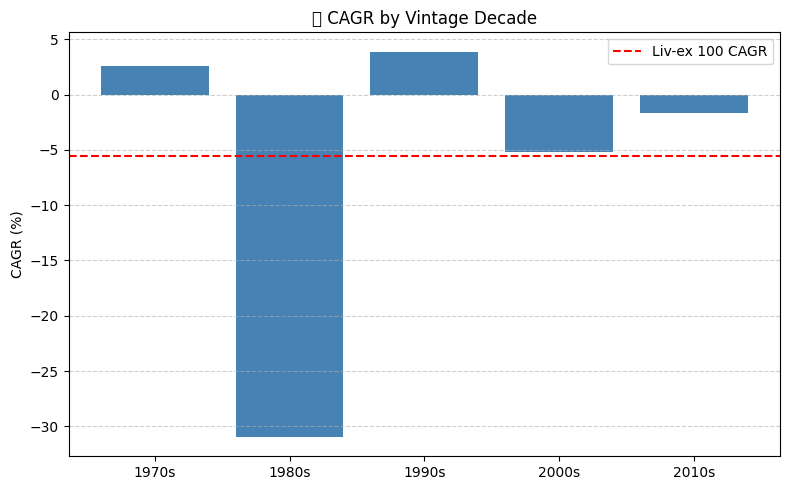


📊 Portfolio Summary:
Total Cost (£)                     : 342,394.23
Total Value (£)                    : 318,710.00
Total Return (£)                   : -23,684.23
Total % Return                     : -6.92
Average CAGR (%)                   : -3.16
Liv-ex 100 CAGR (2022–Now)         : -5.59
Portfolio Alpha (%)                : 2.43

📍 Region Summary:


,Total_Cost,Total_Value,Avg_CAGR_Percent,Avg_Percent_Return,Alpha_vs_Livex100
Region,,,,,
Burgundy,303427.2315,276200.0,-6.661892,-9.135727,-1.076790
California,14550.0001,16900.0,5.617109,15.139828,11.202211
Bordeaux,14406.9995,14420.0,0.244626,4.848010,5.829728
Champagne,10009.9980,11190.0,3.675741,6.699016,9.260843



📆 Decade Summary:


,Total_Cost,Total_Value,Avg_CAGR_Percent,Avg_Percent_Return,Alpha_vs_Livex100
Decade,,,,,
1970s,42000.0000,44000.0,2.599905,4.761905,8.185007
1980s,2000.0000,1530.0,-30.969193,-23.500000,-25.384091
1990s,5050.0000,5900.0,3.893706,12.416332,9.478809
2000s,135535.0001,127590.0,-5.171091,-2.643721,0.414011
2010s,157809.2290,139690.0,-1.632631,-3.136959,3.952471


In [5]:
# -----------------------------------
# 📁 1. Mount Google Drive
# -----------------------------------
from google.colab import drive
drive.mount('/content/drive')

# -----------------------------------
# 📦 2. Imports
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# -----------------------------------
# 📄 3. Load Portfolio File
# -----------------------------------
portfolio_path = "/content/drive/MyDrive/ML-Portfolio/Portfolio Analysis/Processed_Portfolio_Overview.csv"
portfolio_df = pd.read_csv(portfolio_path)
portfolio_df.columns = portfolio_df.columns.str.strip()

# Convert columns to correct types
portfolio_df["Total Cost"] = portfolio_df["Total Cost"].astype(float)
portfolio_df["Total Value"] = portfolio_df["Total Value"].astype(float)
portfolio_df["Absolute Return (£)"] = portfolio_df["Absolute Return (£)"].astype(float)
portfolio_df["% Return"] = portfolio_df["% Return"].astype(float)
portfolio_df["CAGR (%)"] = portfolio_df["CAGR (%)"].astype(float)
portfolio_df["Purchase Date"] = pd.to_datetime(portfolio_df["Purchase Date"], errors="coerce")

# -----------------------------------
# 📊 4. Portfolio Summary
# -----------------------------------
portfolio_summary = {
    "Total Cost (£)": portfolio_df["Total Cost"].sum(),
    "Total Value (£)": portfolio_df["Total Value"].sum(),
    "Total Return (£)": portfolio_df["Absolute Return (£)"].sum(),
    "Total % Return": (portfolio_df["Total Value"].sum() / portfolio_df["Total Cost"].sum() - 1) * 100,
    "Average CAGR (%)": portfolio_df["CAGR (%)"].mean()
}

# -----------------------------------
# 📈 5. Load Liv-ex 100 & Compare CAGR
# -----------------------------------
livex_path = "/content/drive/MyDrive/ML-Portfolio/data/merged_prepared_data_with_preds.csv"
livex_df = pd.read_csv(livex_path)
livex_df.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
livex_df["Date"] = pd.to_datetime(livex_df["Date"], errors='coerce')

livex_100 = livex_df[["Date", "Liv-ex 100"]].dropna().sort_values("Date")
start_2022 = livex_100[livex_100["Date"] >= "2022-01-01"].iloc[0]
end_latest = livex_100.iloc[-1]

years = (end_latest["Date"] - start_2022["Date"]).days / 365.25
livex_cagr = ((end_latest["Liv-ex 100"] / start_2022["Liv-ex 100"]) ** (1 / years) - 1) * 100
portfolio_summary["Liv-ex 100 CAGR (2022–Now)"] = livex_cagr
portfolio_summary["Portfolio Alpha (%)"] = portfolio_summary["Average CAGR (%)"] - livex_cagr

# -----------------------------------
# 📍 6. Regional Breakdown with Alpha
# -----------------------------------
region_summary = (
    portfolio_df
    .groupby("Region")
    .agg(
        Total_Cost=("Total Cost", "sum"),
        Total_Value=("Total Value", "sum"),
        Avg_CAGR_Percent=("CAGR (%)", "mean"),
        Avg_Percent_Return=("% Return", "mean")
    )
    .assign(Alpha_vs_Livex100=lambda df: df["Avg_CAGR_Percent"] - livex_cagr)
    .sort_values(by="Total_Value", ascending=False)
)

# -----------------------------------
# 📆 7. Decade Breakdown with Alpha
# -----------------------------------
portfolio_df["Decade"] = (portfolio_df["Vintage"] // 10 * 10).astype(str) + "s"
decade_summary = (
    portfolio_df
    .groupby("Decade")
    .agg(
        Total_Cost=("Total Cost", "sum"),
        Total_Value=("Total Value", "sum"),
        Avg_CAGR_Percent=("CAGR (%)", "mean"),
        Avg_Percent_Return=("% Return", "mean")
    )
    .assign(Alpha_vs_Livex100=lambda df: df["Avg_CAGR_Percent"] - livex_cagr)
    .sort_index()
)

# -----------------------------------
# 📉 8. Charts: Region Alpha
# -----------------------------------
plt.figure(figsize=(10, 5))
region_summary["Alpha_vs_Livex100"].plot(kind="barh", color="orange")
plt.title("📍 Alpha by Region (vs Liv-ex 100)")
plt.xlabel("Alpha (%)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# -----------------------------------
# 📉 9. Charts: CAGR by Decade
# -----------------------------------
plt.figure(figsize=(8, 5))
plt.bar(decade_summary.index, decade_summary["Avg_CAGR_Percent"], color="steelblue")
plt.axhline(y=livex_cagr, color="red", linestyle="--", label="Liv-ex 100 CAGR")
plt.title("📆 CAGR by Vintage Decade")
plt.ylabel("CAGR (%)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# -----------------------------------
# ✅ 10. Display Summary Tables
# -----------------------------------
print("\n📊 Portfolio Summary:")
for k, v in portfolio_summary.items():
    print(f"{k:<35}: {v:,.2f}")

print("\n📍 Region Summary:")
display(region_summary)

print("\n📆 Decade Summary:")
display(decade_summary)
